#### Author: Jiqi Yang NUID: 001274733

In [1]:
import pandas as pd

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [36]:
data = pd.merge(pd.merge(ratings, users), movies)

In [37]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


### [10 pts] An aggregate of the movie ratings for each particular genre.

In [38]:
ratings_by_genres = data.groupby('genres').size()
print(ratings_by_genres)

genres
Action                                           12311
Action|Adventure                                 10446
Action|Adventure|Animation                         345
Action|Adventure|Animation|Children's|Fantasy      135
Action|Adventure|Animation|Horror|Sci-Fi           618
Action|Adventure|Children's                         44
Action|Adventure|Children's|Comedy                 518
Action|Adventure|Children's|Fantasy                 44
Action|Adventure|Children's|Sci-Fi                 350
Action|Adventure|Comedy                           2077
Action|Adventure|Comedy|Crime                     2573
Action|Adventure|Comedy|Horror                     548
Action|Adventure|Comedy|Horror|Sci-Fi              945
Action|Adventure|Comedy|Romance                   5736
Action|Adventure|Comedy|Sci-Fi                    2538
Action|Adventure|Comedy|War                        213
Action|Adventure|Crime                            1862
Action|Adventure|Crime|Drama                      1431
Act

### [10 pts] The top 5 highest ranked genre by women.

In [39]:
mean_ratings = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
top_women_rankings = mean_ratings.sort_values(by='F', ascending=False)
top_women_rankings[:5]

gender,F,M
genres,,
Animation|Comedy|Thriller,4.550802,4.445110
Animation,4.533333,4.353107
Film-Noir|Romance|Thriller,4.448718,4.211073
Sci-Fi|War,4.376623,4.464789
Adventure|Children's|Drama|Musical,4.355030,4.203138


### [10 pts] The top 5 highest ranked genre by men.

In [40]:
top_men_rankings = mean_ratings.sort_values(by='M', ascending=False)
top_men_rankings[:5]

gender,F,M
genres,,
Sci-Fi|War,4.376623,4.464789
Animation|Comedy|Thriller,4.550802,4.445110
Film-Noir|Mystery,4.319444,4.381536
Adventure|War,4.187970,4.376633
Animation,4.533333,4.353107


### [20 pts] A breakdown of a movies ratings by age, use any movie of your choice.

Populating the interactive namespace from numpy and matplotlib


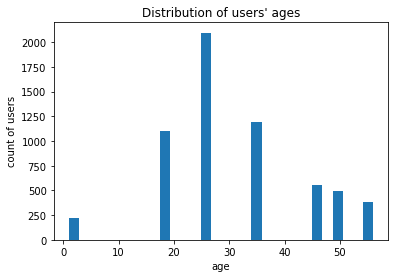

In [41]:
%pylab inline
import matplotlib.pyplot as plt

users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [42]:
ratings_by_ages = data.groupby('age').size()
ratings_by_ages

age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
dtype: int64

In [43]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data.age, range(0, 81, 10), right=False, labels=labels)
data[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,1,0-9
1,56,50-59
2,25,20-29
4,50,50-59
5,18,10-19
9,45,40-49
20,35,30-39


In [44]:
import numpy as np
rating_age_group = data.groupby('age_group').agg({'rating': [np.size, np.mean]})

In [45]:
# data.set_index('movie_id', inplace=True)
by_age = data.loc[data.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                      age_group
$1,000,000 Duck (1971)     10-19        3.000000
                           20-29        3.090909
                           30-39        3.133333
                           40-49        2.000000
                           50-59        2.750000
'Night Mother (1986)       0-9          2.000000
                           10-19        4.666667
                           20-29        3.423077
                           30-39        2.904762
                           40-49        3.833333
                           50-59        3.750000
'Til There Was You (1997)  0-9          3.500000
                           10-19        2.500000
                           20-29        2.666667
                           30-39        2.900000
Name: rating, dtype: float64

In [46]:
million_duck = data[data.title == '$1,000,000 Duck (1971)']

In [47]:
rating_age = million_duck.groupby('age_group').agg({'rating':[np.size, np.mean]})

In [48]:
md_by_age = million_duck.loc[million_duck.index].groupby(['title','age'])

In [49]:
md_by_age.rating.mean()

title                   age
$1,000,000 Duck (1971)  18     3.000000
                        25     3.090909
                        35     3.133333
                        45     2.000000
                        50     2.750000
Name: rating, dtype: float64

In [50]:
data[data.user_id==1]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,0-9
1725,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,0-9
2250,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,0-9
2886,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,0-9
4201,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,0-9
5904,1,1197,3,978302268,F,1,10,48067,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,0-9
8222,1,1287,5,978302039,F,1,10,48067,Ben-Hur (1959),Action|Adventure|Drama,0-9
8926,1,2804,5,978300719,F,1,10,48067,"Christmas Story, A (1983)",Comedy|Drama,0-9
10278,1,594,4,978302268,F,1,10,48067,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,0-9
11041,1,919,4,978301368,F,1,10,48067,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,0-9


In [51]:
# A function that given a user id and movie id , returns a list of user ids for
# other users that rated the movie identifed by the provided movie id with the same score.
user_id = 1
movie_id = 1193
tmp1 = data[data.movie_id == 1193]
tmp2 = tmp1[tmp1.rating == 5]
tmp3 = tmp2[tmp2.user_id != 1]
# list(tmp3.user_id)
tmp3['user_id']


1          2
4         17
6         19
7         24
9         33
10        39
16        53
17        54
18        58
22        81
23        88
24        89
25        95
28       102
30       107
32       120
33       123
34       131
38       150
40       155
41       166
42       169
43       175
45       180
46       190
49       195
53       208
60       235
61       236
64       259
        ... 
1668    5859
1669    5865
1670    5868
1674    5888
1676    5890
1682    5911
1684    5917
1685    5920
1687    5924
1690    5942
1693    5948
1694    5949
1695    5950
1697    5954
1698    5956
1699    5958
1700    5962
1701    5964
1702    5965
1706    5975
1708    5977
1709    5978
1712    5986
1714    6001
1715    6002
1718    6021
1719    6032
1720    6033
1721    6035
1722    6036
Name: user_id, Length: 936, dtype: int64

In [52]:
score = int(tmp2[tmp2.user_id == 1]['rating'])

### [30 pts] A function that given a user id and movie id , returns a list of user ids for other users that rated the movie identi_ed by the provided movie id with the same score.

In [53]:
def other_user_same_movie_same_score(user_id, movie_id):
    tmp1 = data[data.movie_id == movie_id]
    
    score = int(tmp1[tmp1.user_id == user_id]['rating'])
    tmp2 = tmp1[tmp1.rating == score]
    tmp3 = tmp2[tmp2.user_id != user_id]
    return list(tmp3.user_id)

In [55]:

tmp2 = tmp1[tmp1.rating == score]
tmp2

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,0-9
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,50-59
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,50-59
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama,0-9
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama,20-29
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama,40-49
10,39,1193,5,978043535,M,18,4,61820,One Flew Over the Cuckoo's Nest (1975),Drama,10-19
16,53,1193,5,977946400,M,25,0,96931,One Flew Over the Cuckoo's Nest (1975),Drama,20-29
17,54,1193,5,977944039,M,50,1,56723,One Flew Over the Cuckoo's Nest (1975),Drama,50-59
18,58,1193,5,977933866,M,25,2,30303,One Flew Over the Cuckoo's Nest (1975),Drama,20-29


In [41]:
# print("A function that given a user id and movie id , returns a list of user ids for other users that rated the movie identifed by the provided movie id with the same score.")

other_user_same_movie_same_score(1, 1193)

[2,
 17,
 19,
 24,
 33,
 39,
 53,
 54,
 58,
 81,
 88,
 89,
 95,
 102,
 107,
 120,
 123,
 131,
 150,
 155,
 166,
 169,
 175,
 180,
 190,
 195,
 208,
 235,
 236,
 259,
 261,
 265,
 266,
 270,
 281,
 287,
 292,
 293,
 297,
 299,
 300,
 301,
 306,
 307,
 315,
 319,
 327,
 332,
 334,
 339,
 352,
 355,
 357,
 361,
 409,
 424,
 425,
 437,
 438,
 439,
 440,
 442,
 445,
 451,
 453,
 462,
 477,
 480,
 482,
 489,
 491,
 502,
 504,
 505,
 507,
 515,
 516,
 520,
 524,
 526,
 529,
 537,
 549,
 550,
 551,
 558,
 560,
 582,
 588,
 599,
 611,
 622,
 626,
 637,
 650,
 661,
 671,
 673,
 677,
 679,
 681,
 682,
 692,
 701,
 710,
 711,
 743,
 744,
 746,
 752,
 760,
 764,
 770,
 771,
 774,
 784,
 785,
 791,
 833,
 839,
 840,
 841,
 843,
 846,
 870,
 900,
 919,
 928,
 935,
 946,
 957,
 965,
 980,
 983,
 994,
 1010,
 1015,
 1017,
 1018,
 1019,
 1027,
 1028,
 1035,
 1036,
 1038,
 1040,
 1048,
 1058,
 1062,
 1068,
 1077,
 1084,
 1088,
 1098,
 1099,
 1101,
 1105,
 1108,
 1113,
 1117,
 1121,
 1124,
 1133,
 1134,
 

### [20 pts] Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.


In [20]:
#gender_difference = \
# ?data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
mean_ratings

gender,F,M
genres,,
Action,3.367474,3.352991
Action|Adventure,3.701213,3.671115
Action|Adventure|Animation,3.843750,4.217082
Action|Adventure|Animation|Children's|Fantasy,3.146341,2.510638
Action|Adventure|Animation|Horror|Sci-Fi,3.422535,3.563071
Action|Adventure|Children's,1.250000,1.325000
Action|Adventure|Children's|Comedy,2.447154,2.263291
Action|Adventure|Children's|Fantasy,1.857143,2.135135
Action|Adventure|Children's|Sci-Fi,2.163636,1.820339


Populating the interactive namespace from numpy and matplotlib


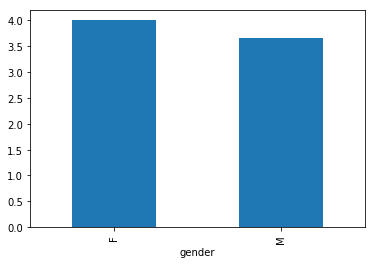

In [32]:
%pylab inline
import matplotlib.pyplot as plt
plt.figure()
mean_ratings.loc['Musical'].plot.bar()

#### Analysis:
Female audience tend to rate higher than male audience.

In [34]:
million_duck = data[data.title == '$1,000,000 Duck (1971)']
million_duck

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
985679,216,2031,2,976867230,M,45,13,52761,"$1,000,000 Duck (1971)",Children's|Comedy
985680,494,2031,5,976215651,F,35,0,17870,"$1,000,000 Duck (1971)",Children's|Comedy
985681,714,2031,4,975782711,M,18,4,76013,"$1,000,000 Duck (1971)",Children's|Comedy
985682,869,2031,1,999376619,M,18,20,92026,"$1,000,000 Duck (1971)",Children's|Comedy
985683,1034,2031,3,975093319,F,35,1,82601,"$1,000,000 Duck (1971)",Children's|Comedy
985684,1111,2031,5,974919045,F,50,16,44319,"$1,000,000 Duck (1971)",Children's|Comedy
985685,1141,2031,4,984794096,F,25,3,84770,"$1,000,000 Duck (1971)",Children's|Comedy
985686,1556,2031,3,974996980,M,18,4,48073,"$1,000,000 Duck (1971)",Children's|Comedy
985687,1635,2031,2,977113165,M,25,0,97212,"$1,000,000 Duck (1971)",Children's|Comedy
985688,1645,2031,5,974979904,F,18,9,62225,"$1,000,000 Duck (1971)",Children's|Comedy


In [35]:
million_duck['rating'].describe()

count    37.000000
mean      3.027027
std       1.092563
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64

#### Analysis:
Above are several statiscal features of the ratings for the movie "Million Duck". There are 37 ratings in total range from 1 to 5. The mean rating is 3.027.